<a href="https://colab.research.google.com/github/shjiinn/Python_Review/blob/master/%EB%AA%A8%EB%8D%B8%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 모델의 성능 향상시키기

1. 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)
# 데이터를 미리 보겠습니다.
df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 39ms/step - loss: 7.1331 - accuracy: 0.7403 - val_loss: 5.3220 - val_accuracy: 0.7792
Epoch 2/50
8/8 [==============================] - 0

In [3]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9369
Test accuracy: 0.936923086643219


2. 모델 업데이트하기

기본 코드 불러오기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


모델의 저장 설정 및 실행

In [8]:
# 모델 저장의 조건을 설정합니다.
# 모델 또는 가중치를 저장할 때 사용되는 콜백함수
#verbose는 저장된 상태를 보여줌
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint 

In [9]:
# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.8931.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9069.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9154.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9154.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9169.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9200.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9277.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9262.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9308.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9254.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9331.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9331.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9323.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9331.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9362.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9362.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9377.hdf5

Epoch

In [10]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 1s 10ms/step - loss: 0.1244 - accuracy: 0.9492
Test accuracy: 0.9492307901382446


3. 그래프로 과적합 확인하기



In [11]:
# 그래프 확인을 위한 긴 학습 
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)


Epoch 1/2000
8/8 [==============================] - 0s 29ms/step - loss: 0.1283 - accuracy: 0.9494 - val_loss: 0.1226 - val_accuracy: 0.9515
Epoch 2/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1271 - accuracy: 0.9512 - val_loss: 0.1261 - val_accuracy: 0.9523
Epoch 3/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1263 - accuracy: 0.9520 - val_loss: 0.1214 - val_accuracy: 0.9523
Epoch 4/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1244 - accuracy: 0.9515 - val_loss: 0.1193 - val_accuracy: 0.9515
Epoch 5/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1234 - accuracy: 0.9530 - val_loss: 0.1177 - val_accuracy: 0.9531
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1232 - accuracy: 0.9528 - val_loss: 0.1162 - val_accuracy: 0.9523
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1200 - accuracy: 0.9533 - val_loss: 0.1155 - val_accuracy: 0.9523
Epoch 8/2000


In [12]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df


,loss,accuracy,val_loss,val_accuracy
0,0.128307,0.949448,0.122591,0.951538
1,0.127122,0.951245,0.126087,0.952308
2,0.126322,0.952014,0.121358,0.952308
3,0.124385,0.951501,0.119254,0.951538
4,0.123357,0.953041,0.117732,0.953077
...,...,...,...,...
1995,0.021758,0.994355,0.092203,0.986923
1996,0.022971,0.994355,0.094709,0.986154
1997,0.021653,0.993841,0.090036,0.986154
1998,0.024514,0.992045,0.093708,0.986923


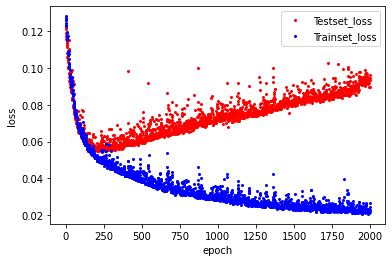

In [13]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']
#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


4. 학습의 자동 중단

기본 코드 불러오기

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


학습의 자동 중단 및 최적화 모델 저장

In [15]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/bestmodel.hdf5"
# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 3s 35ms/step - loss: 4.1819 - accuracy: 0.2397 - val_loss: 3.1055 - val_accuracy: 0.2554
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 2.3252 - accuracy: 0.2402 - val_loss: 1.1740 - val_accuracy: 0.2746
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.6132 - accuracy: 0.6500 - val_loss: 0.4076 - val_accuracy: 0.7823
Epoch 4/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.4251 - accuracy: 0.7898 - val_loss: 0.4562 - val_accuracy: 0.7638
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3980 - accuracy: 0.7844 - val_loss: 0.3907 - val_accuracy: 0.7700
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3458 - accuracy: 0.7963 - val_loss: 0.3531 - val_accuracy: 0.7869
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3346 - accuracy: 0.8158 - val_loss: 0.3496 - val_accuracy: 0.8023
Epoch 8/2000


In [16]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


41/41 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9823
Test accuracy: 0.9823076725006104


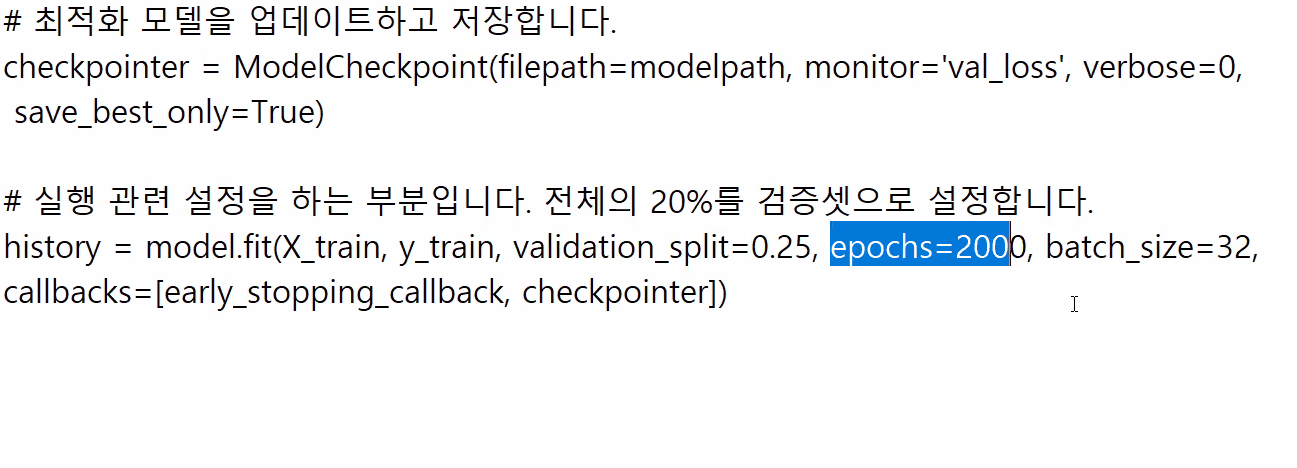

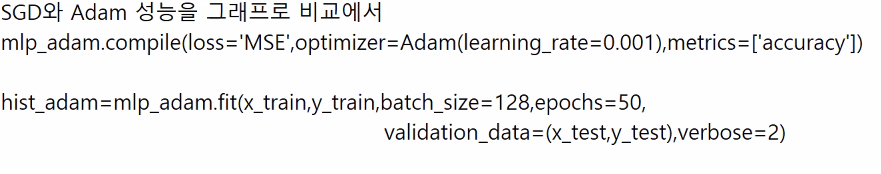